
# Project: No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>


<a id='intro'></a>
## Introduction

> **Brife Description of the dataset**: In this project I will analyze the Medical Appointment Attendance Rates dataset that have been collected from 100k medical appointments in Brazil. The data has been downloaded as csv file and manipulate using pandas, numpy, matplotlib and jupyter notebook.
     I investigated by breaking down the data categorically to examine common assumptions based on Gender, Age, Economics, Disease, Technical Aptitude, or Wait time were indicators of a patient showing up for an appointment. 
     This dataset is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> **The questions that can be formulated and answered with the help of this dataset are:**
1. What factors are important to know in order to predict if a patient will show up for their scheduled appointment?
2. What is the overall status of patients attendances to appointments?
3. What is the gender distribution for show / no-show patients?
4. What is the patient age distribution of no-shows versus shows?
5. What is the patient health designation breakdown of no-shows versus shows?
6. Which Locations have the highest number of no-shows?
7. Do appointment no-shows occur on specific days of the week?
8. Are people receiving SMS are more likely to show up?
9. Do no-shows have a larger time gap between scheduled date and appointment date?


###  Preparing to Investigate

I prepared the data using these common python data analysis tools/packages: numpy, pandas, and matplotlib.

In [669]:
# import the modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})

%matplotlib inline
# I have a retina screen, and this magic makes the charts more sharp
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable.

### General Properties
First, I have to load the data and print out a few lines  Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [670]:
#load the dataset from the csv file into a dataframe
df = pd.read_csv('no-show-dset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [671]:
# find number of samples and columns in dataset 
df.shape 

(110527, 14)

In [672]:
# find number of the duplicate rows in dataset
df.duplicated().sum()

0

In [673]:
# find datatypes and all of columns 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [674]:
# find the number of missing values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [675]:
# find the number of non-null unique values in the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [676]:
# find useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [677]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [678]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Data Cleaning 
After we assessed the data we have to fix some issue regarding that and do pure clean to come up with readable dataframe

#####  There are multiple issues that need to be fixed in this dataset:

    1. There no extraneous columns that can be dropped
    2. The naming machnisem and spelling is very bad so we need to fix this issue.
    3. The features should be all in lowercase.
    4. The spaces should be replaced it by underscore '_'.
    5. There is no need for filterazation, drop nulls (missing values) or drop duplicates since they are DNE! 
    6. Column 'PatientId' should be converted from float to integer.
    7. Columns 'AppointmentDay' and 'ScheduledDay' should be converted from objects to datetime for consistency.
    8. Column 'Age' also has some erroneous values (-1 and 115).
    9. 'Handcap' has a max value of 4.

In [679]:
# Rename columns to correct spelling errors and for consistency and clarity
df.rename(columns={'PatientId':'Patient Id', 'AppointmentID':'Appointment Id', 'ScheduledDay':'Scheduled Day',
                        'AppointmentDay':'Appointment Day','Neighbourhood':'Location', 'Hipertension':'Hypertension',
                        'Handcap':'Handicap', 'No-show':'No Show', }, inplace=True)
#confirm changes
df.head(1)

,Patient Id,Appointment Id,Gender,Scheduled Day,Appointment Day,Age,Location,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [680]:
# replace spaces with underscores and lowercase labels
df.rename(columns=lambda x:x.strip().lower().replace(" ", "_"), inplace=True)

#confirm changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [681]:
# convert patient_id from float to int64.
# df['patient_id'].value_counts()
df_v0 = df
df_v0['patient_id'] = df_v0['patient_id'].astype('int64')

#confirm changes
df_v0.head(1)
# df['patient_id'].value_counts()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [682]:
#convert scheduled_day and appointment_day from objects to datetime
df_v0['scheduled_day'] = pd.to_datetime(df_v0['scheduled_day'])
df_v0['appointment_day'] = pd.to_datetime(df_v0['appointment_day'])

#confirm changes
df_v0.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [683]:
# # Converting no_show field from string to int so it can be plotted in charts
# df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)

# #confirm changes
# df_v0.head(1)

In [684]:
df_v0.T

,0,1,2,3,4,5,6,7,8,9,...,110517,110518,110519,110520,110521,110522,110523,110524,110525,110526
patient_id,29872499824296,558997776694438,4262962299951,867951213174,8841186448183,95985133231274,733688164476661,3449833394123,56394729949972,78124564369297,...,5574942418928,72633149253362,65423877893936,996997666245785,36355337746436,2572134369293,3596266328735,15576631729893,92134931435557,377511518121127
appointment_id,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,...,5780122,5630375,5630447,5650534,5651072,5651768,5650093,5630692,5630323,5629448
gender,F,M,F,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
scheduled_day,2016-04-29 18:38:08,2016-04-29 16:08:27,2016-04-29 16:19:04,2016-04-29 17:29:31,2016-04-29 16:07:23,2016-04-27 08:36:51,2016-04-27 15:05:12,2016-04-27 15:39:58,2016-04-29 08:02:16,2016-04-27 12:48:25,...,2016-06-07 07:38:34,2016-04-27 15:15:06,2016-04-27 15:23:14,2016-05-03 07:51:47,2016-05-03 08:23:40,2016-05-03 09:15:35,2016-05-03 07:27:33,2016-04-27 16:03:52,2016-04-27 15:09:23,2016-04-27 13:30:56
appointment_day,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,...,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00
age,62,56,62,8,56,76,23,39,21,19,...,19,50,22,42,53,56,51,21,38,54
location,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,...,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ
scholarship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hypertension,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
diabetes,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [685]:
df_v0.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
location                   object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

While we knew that the age range had unreasonable and inaccurate values, we checked to see how many rows would be affected. The number of rows affected were minimal so the decision was made to remove those rows from the dataframe.

In [686]:
df_v0.loc[(df_v0['age'] < 0) | (df_v0['age'] > 100)].count()

patient_id         8
appointment_id     8
gender             8
scheduled_day      8
appointment_day    8
age                8
location           8
scholarship        8
hypertension       8
diabetes           8
alcoholism         8
handicap           8
sms_received       8
no_show            8
dtype: int64

In [687]:
#Locate rows with age below 0 or above 100.
outAge = df_v0.loc[(df_v0['age'] < 0) | (df_v0['age'] > 100)]

In [688]:
#Drop rows with Age below 0 and above 100.
df_v0.drop(outAge.index, axis=0, inplace=True)

#confirm chnage 
df_v0.loc[(df_v0['age'] < 0) | (df_v0['age'] > 100)].count()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
location           0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

The featrue Handicap values is not discernable. In the first 4 rows above, it appeared that there was a coorelation between the specified diseases and the values in Handicap. However, the following row deviates from this with a value of 2 and all specified disease values are 0. For this reason, the Handicap column was dropped from the dataframe.

In [689]:
#Check values stored in Handicap and the total of those values.
df_v0['handicap'].value_counts()

0    108282
1      2038
2       183
3        13
4         3
Name: handicap, dtype: int64

In [690]:
#removing Handicap from the dataframe
df_v0.drop(['handicap'], axis=1, inplace=True)

#confirm change
df_v0.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No


##### We could introduce multiple new columns In order to measure the affect of wait-time

An additional column Days was added to calculate the days a patient waited for an appointment.!
    + Add new columns called 'elapsed_days' that take the difference between the 'scheduled_day' and 'appointment_day'
    + Add new columns called 'scheduled_dayofweek'
    + Add new columns called 'scheduled_hours'
    + Add new columns called 'appointment_dayofweek'
    + Add new columns called 'age_range'

In [691]:
df_v1 = df_v0
# calculate the total days a patient will wait for their appointment and put that in a new column
df_v1['elapsed_days'] = df_v1['appointment_day'] - df_v1['scheduled_day']
df_v1['elapsed_days'] = df_v1['elapsed_days'].dt.days


# extract the scheduled days and put it in a new colmun
df_v1['scheduled_wday'] = df_v1['scheduled_day'].dt.weekday_name

# extract the scheduled hours and put that in a new column
df_v1['scheduled_hour'] = df_v1['scheduled_day'].apply(lambda time: time.hour)

# extract the appointment days and put it in a new colmun
df_v1['appointment_wday'] = df_v1['appointment_day'].dt.weekday_name

# extract the numerical ages and put it into categrise range
df_v1['age_range'] = pd.qcut(df_v1.age, 4, labels=["child","young","adult","aged"])

# saperate the no-show column into two different columns
df_v1 = pd.concat([df_v1, pd.get_dummies(df_v1['no_show'],prefix='no_show')], axis=1); 

# saperate the no-show column into two different columns
df_v1 = pd.concat([df_v1, pd.get_dummies(df_v1['sms_received'],prefix='sms_received')], axis=1); 
df_v1.rename(columns={'sms_received_0':'sms_received_no', 'sms_received_1':'sms_received_yes'},inplace=True);


# confirm changes 
df_v1.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,...,no_show,elapsed_days,scheduled_wday,scheduled_hour,appointment_wday,age_range,no_show_No,no_show_Yes,sms_received_no,sms_received_yes
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,No,-1,Friday,18,Friday,aged,1,0,1,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,No,-1,Friday,16,Friday,aged,1,0,1,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,No,-1,Friday,16,Friday,aged,1,0,1,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,No,-1,Friday,17,Friday,child,1,0,1,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,No,-1,Friday,16,Friday,aged,1,0,1,0


In [692]:
df_v1.T

,0,1,2,3,4,5,6,7,8,9,...,110517,110518,110519,110520,110521,110522,110523,110524,110525,110526
patient_id,29872499824296,558997776694438,4262962299951,867951213174,8841186448183,95985133231274,733688164476661,3449833394123,56394729949972,78124564369297,...,5574942418928,72633149253362,65423877893936,996997666245785,36355337746436,2572134369293,3596266328735,15576631729893,92134931435557,377511518121127
appointment_id,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,...,5780122,5630375,5630447,5650534,5651072,5651768,5650093,5630692,5630323,5629448
gender,F,M,F,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
scheduled_day,2016-04-29 18:38:08,2016-04-29 16:08:27,2016-04-29 16:19:04,2016-04-29 17:29:31,2016-04-29 16:07:23,2016-04-27 08:36:51,2016-04-27 15:05:12,2016-04-27 15:39:58,2016-04-29 08:02:16,2016-04-27 12:48:25,...,2016-06-07 07:38:34,2016-04-27 15:15:06,2016-04-27 15:23:14,2016-05-03 07:51:47,2016-05-03 08:23:40,2016-05-03 09:15:35,2016-05-03 07:27:33,2016-04-27 16:03:52,2016-04-27 15:09:23,2016-04-27 13:30:56
appointment_day,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,...,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00
age,62,56,62,8,56,76,23,39,21,19,...,19,50,22,42,53,56,51,21,38,54
location,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,...,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ
scholarship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hypertension,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
diabetes,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [693]:
df_v1.dtypes

patient_id                   int64
appointment_id               int64
gender                      object
scheduled_day       datetime64[ns]
appointment_day     datetime64[ns]
age                          int64
location                    object
scholarship                  int64
hypertension                 int64
diabetes                     int64
alcoholism                   int64
sms_received                 int64
no_show                     object
elapsed_days                 int64
scheduled_wday              object
scheduled_hour               int64
appointment_wday            object
age_range                 category
no_show_No                   uint8
no_show_Yes                  uint8
sms_received_no              uint8
sms_received_yes             uint8
dtype: object

In [694]:
# save final CLEAN dataset as new file
df_v1.to_csv('no_show_dset_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data is more consistent, we build a framework to guide our analysis. This will allow us to ask meaningful questions of the data. In doing this we ask common and possibly stereo-typical questions of the data. 



### Research Question 1: What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

In [695]:
df_clean = pd.read_csv('no_show_dset_clean.csv')
# Function to calculate percentage
def percentage(amount,total):
    return (amount / total) * 100

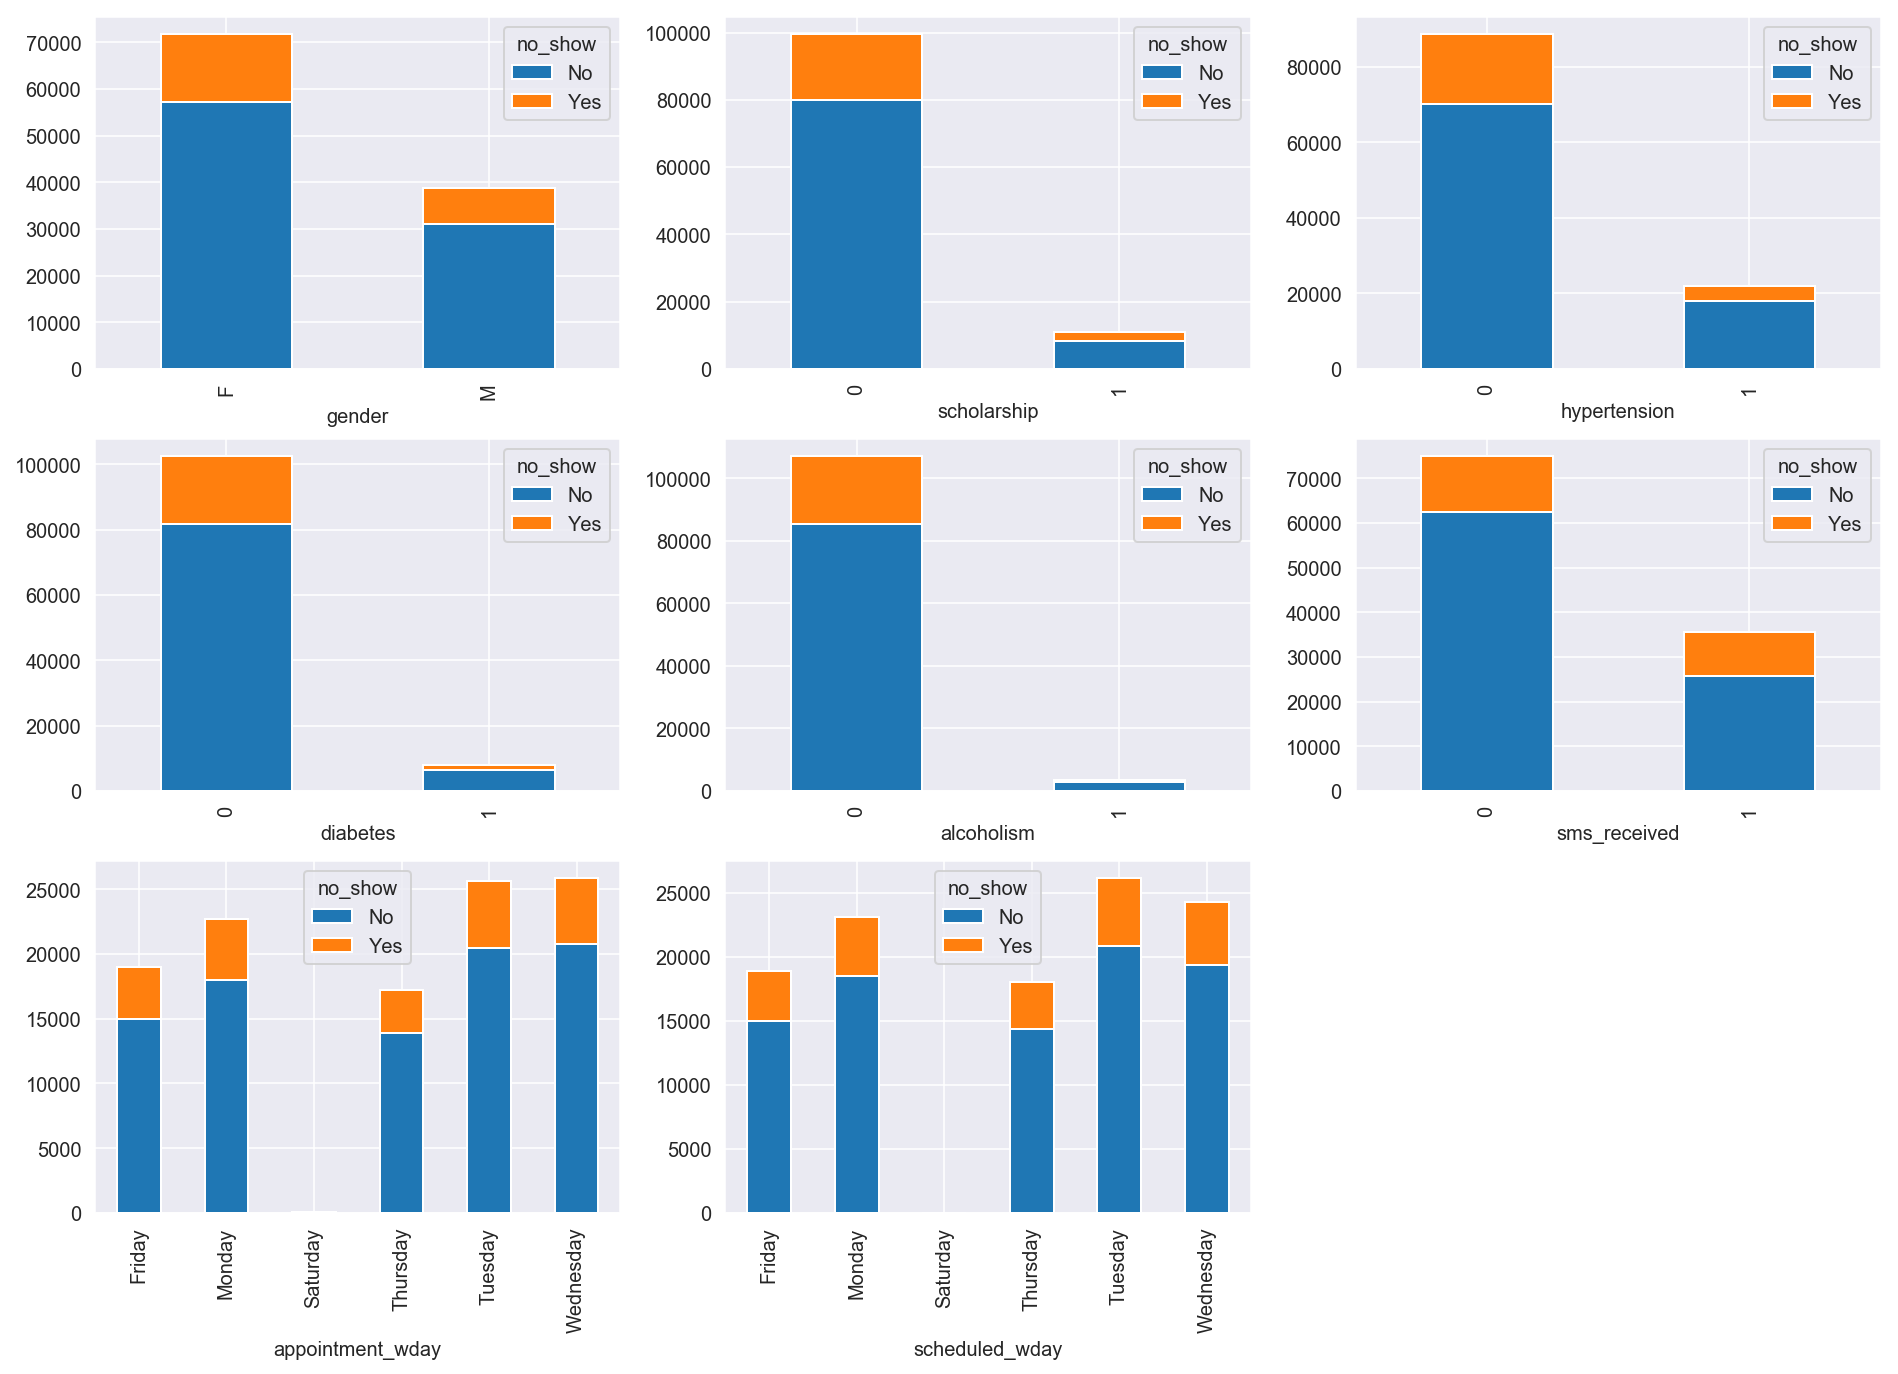

In [696]:
# First, let's look at categorical variables
categorical_vars = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received', 'appointment_wday', 'scheduled_wday']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df_clean.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

> **Concluison:** For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.

### Research Question 2: What is the overall status of patients attendances to appointments?

In [697]:
df_no_show_yes = df_clean.query('no_show == "Yes"')
df_no_show_no = df_clean.query('no_show == "No"')

num_no_show_yes = df_no_show_yes['no_show'].value_counts()[0]
num_no_show_no = df_no_show_no['no_show'].value_counts()[0]


no_show_yes_percentage = round((num_no_show_yes/df_clean['no_show'].count())*100,2)
no_show_no_percentage = round((num_no_show_no/df_clean['no_show'].count())*100,2)

print('Percentage of appointments have not been attending by patients: {}%'.format(no_show_yes_percentage))
print('Percentage of appointments have been attending by patients: {}%'.format(no_show_no_percentage))

Percentage of appointments have not been attending by patients: 20.19%
Percentage of appointments have been attending by patients: 79.81%


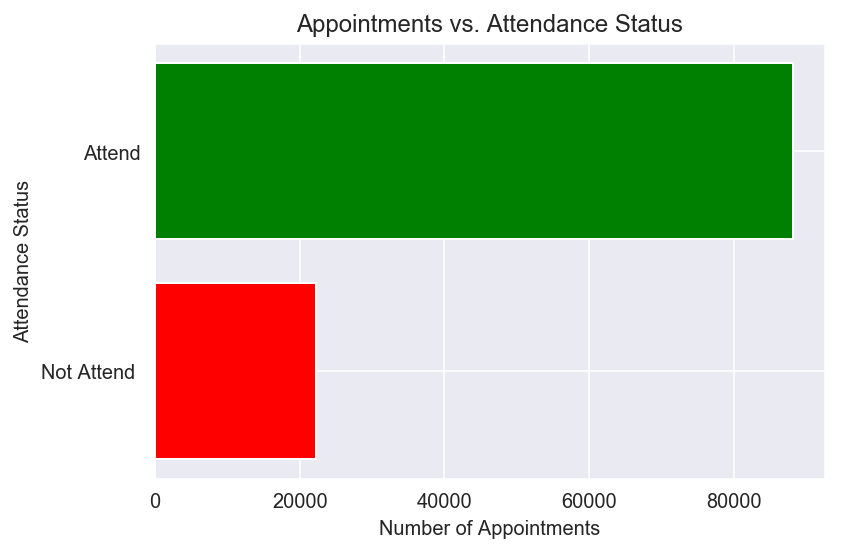

In [698]:
labels = ["Not Attend ","Attend"]
numOfAppoints = [num_no_show_yes, num_no_show_no]

#plot bars chart with x tick label
plt.barh(labels, numOfAppoints, color=['red', 'green'], tick_label=labels);
plt.ylabel("Attendance Status");
plt.xlabel("Number of Appointments");
plt.title("Appointments vs. Attendance Status");

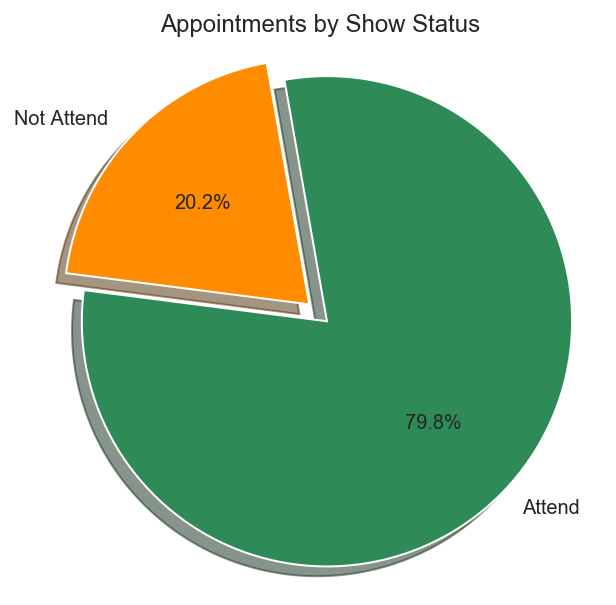

In [699]:
# figure(figsize=(8, 6))
# labels = ["Not Attend ","Attend"]
# numOfPatients = [no_show_yes_percentage, no_show_no_percentage]

# #plot bars chart with labels tick label
# plt.barh(labels_pos, numOfPatients, color=['darkorange', 'seagreen'], tick_label=labels);
# plt.ylabel("Attendance Status");
# plt.xlabel("Percentage of Patients");
# plt.title("Percentages per Appointments Status");

# Data to plot
labels = ["Not Attend ","Attend"]
numOfAppoints = [no_show_yes_percentage, no_show_no_percentage]
colors = ['darkorange', 'seagreen']
explode = (0, 0.1)

# The plot
plt.pie(numOfAppoints, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Appointments by Show Status')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

> **Concluison:** It seems that most patients showed up for their appointments by a margin of 4 to 1. This indicates a small percentage of patients did not go to their appointments.

In [700]:
def missed_ratio(dataframe, feature, value):
    all_appoints = len(dataframe.loc[dataframe[feature] == value])
    missid_appoints = len(dataframe.loc[(dataframe[feature] == value) & (df_clean['no_show'] == "Yes")])
    return (missid_appoints / all_appoints) * 100

### Research Question 3: What is the gender distribution for show / no-show patients?

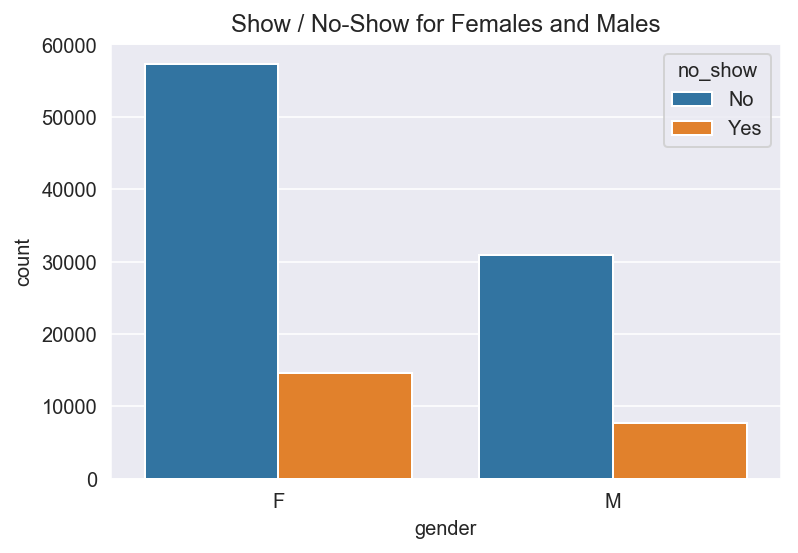

Out of 71832 appointments made by females, 14591 were missed with the ratio of 20%.
Out of 38687 appointments made by males, 7725 were missed with the ratio of 20%.


In [701]:
# all_appointments_by_f = len(df_clean.loc[df_clean['gender'] == "F"])
# all_appointments_by_m = len(df_clean.loc[df_clean['gender'] == "M"])

# missed_appointments_by_f = len(df_clean.query('no_show == "Yes" and gender == "F"'))
# missed_appointments_by_m = len(df_clean.loc[(df_clean['gender'] == "M") & (df_clean['no_show'] == "Yes")])

# missed_ratio_f = int(round(missed_appointments_by_f/all_appointments_by_f*100))
# missed_ratio_m = int(round(missed_appointments_by_m/all_appointments_by_m*100))

missed_ratio(df_clean, 'gender', "F")
missed_ratio(df_clean,'gender', "M")


ax = sns.countplot(x=df_clean.gender, hue=df_clean.no_show, data=df_clean)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'.format(all_appointments_by_f, missed_appointments_by_f, missed_ratio_f))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(all_appointments_by_m, missed_appointments_by_m, missed_ratio_m))

> **Concluison:** From the visualization it is pretty much clear that this distribution is skewed towards women. Though women are likely to show up to their appointment, the no-shows percent of both male and women doesn’t vary too much. Apparently, gender has no influence on proportion of no-shows

### Research Question 4: What is the patient age distribution of no-shows versus shows?

In [702]:
df_clean.age_range.unique()

array(['aged', 'child', 'young', 'adult'], dtype=object)

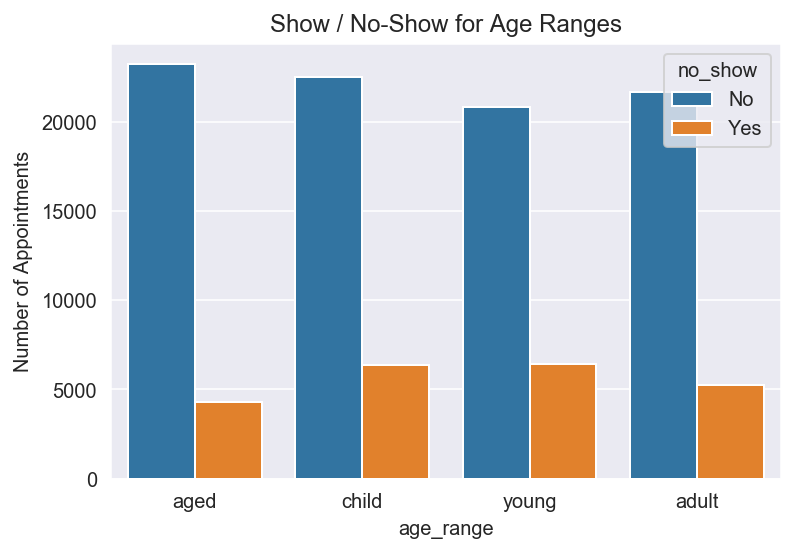

In [703]:
# all_appointments_by_aged = len(df_clean.loc[df_clean['age_range'] == "aged"])
# all_appointments_by_child = len(df_clean.loc[df_clean['age_range'] == "child"])
# all_appointments_by_young = len(df_clean.loc[df_clean['age_range'] == "young"])
# all_appointments_by_adult = len(df_clean.loc[df_clean['age_range'] == "adult"])

# missed_appointments_by_aged = len(df_clean.query('no_show == "Yes" and age_range == "aged"'))
# missed_appointments_by_child = len(df_clean.loc[(df_clean['age_range'] == "child") & (df_clean['no_show'] == "Yes")])
# missed_appointments_by_young = len(df_clean.query('no_show == "Yes" and age_range == "young"'))
# missed_appointments_by_adult = len(df_clean.loc[(df_clean['age_range'] == "adult") & (df_clean['no_show'] == "Yes")])

# missed_ratio_aged = int(round(percentage(missed_appointments_by_aged, all_appointments_by_aged)))
# missed_ratio_child = int(round(percentage(missed_appointments_by_child, all_appointments_by_child)))
# missed_ratio_young = int(round(percentage(all_appointments_by_young, missed_appointments_by_young)))
# missed_ratio_adult = int(round(percentage(missed_appointments_by_adult, all_appointments_by_adult)))

missed_ratio(df_clean,'age_range', "child")
missed_ratio(df_clean, 'age_range', "young")
missed_ratio(df_clean, 'age_range', "adult")
missed_ratio(df_clean, 'age_range', "aged")



ax = sns.countplot(x=df_clean.age_range, hue=df_clean.no_show, data=df_clean)
ax.set_title("Show / No-Show for Age Ranges")
ax.set_ylabel("Number of Appointments");
x_ticks_labels=['Child', 'Young', 'Adult', 'Aged']
plt.show();


> **Concluison:** From the visualization it is clear that this distribution is skewed towards aged then child. Though aged and child are likely to show up to their appointments.

### Research Question 5: What is the patient health designation breakdown of no-shows versus shows?

In [704]:
# filter by no-shown appointments and health profile
hypertension_data = df_clean.groupby('hypertension').no_show.value_counts()
diabetes_data = df_clean.groupby('diabetes').no_show.value_counts()
alcoholism_data = df_clean.groupby('alcoholism').no_show.value_counts()
hypertension_data, diabetes_data, alcoholism_data

(hypertension  no_show
 0             No         70175
               Yes        18544
 1             No         18028
               Yes         3772
 Name: no_show, dtype: int64, diabetes  no_show
 0         No         81690
           Yes        20886
 1         No          6513
           Yes         1430
 Name: no_show, dtype: int64, alcoholism  no_show
 0           No         85520
             Yes        21639
 1           No          2683
             Yes          677
 Name: no_show, dtype: int64)

In [705]:
# a = missed_ratio(df_clean,'hypertension', 1)
# b = missed_ratio(df_clean, 'diabetes', 0)
# c = missed_ratio(df_clean, 'alcoholism', 0)

# explore the trends  and calculate the percentages of patients of no-shown appointments
ns_yes_df = df_clean.query('no_show == "Yes"')
ns_percentages = []
def print_no_show_health_stats(value, h_type):
    percent = ((value/len(ns_yes_df.index)) * 100).round(2)
    ns_percentages.append([h_type, percent])
    print("{} patients i.e, {}% who didn't show up to appointment are associated with {}\n".format(
        value, percent, h_type))
    
print_no_show_health_stats(hypertension_data[1]['Yes'], 'hypertension')
print_no_show_health_stats(diabetes_data[1]['Yes'], 'diabetes')
print_no_show_health_stats(alcoholism_data[1]['Yes'], 'alcoholism')

3772 patients i.e, 16.9% who didn't show up to appointment are associated with hypertension

1430 patients i.e, 6.41% who didn't show up to appointment are associated with diabetes

677 patients i.e, 3.03% who didn't show up to appointment are associated with alcoholism



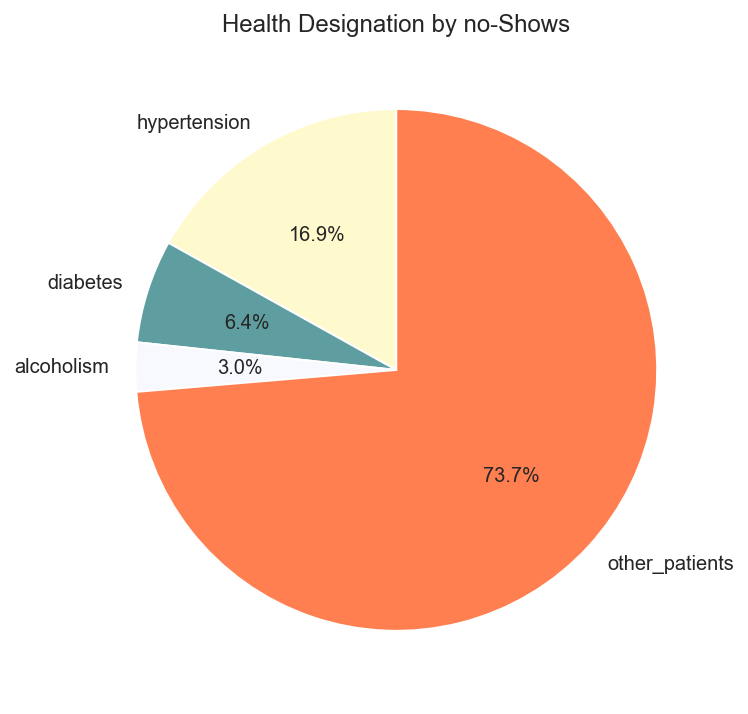

In [706]:
# # The plot
# labels = ['Hypertension', 'Diabetes', 'Alcoholism']
# sizes = [a, b, c]
# colors = ['lightgreen', 'lightblue', 'aquamarine']
# explode = (0, 0, 0.1)

# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=140)

# plt.title('Health Designation by Shows')
# plt.axis('equal')
# fig = plt.gcf()
# fig.set_size_inches(5,5);

# plot a chart of health profile stats of no-shows
other_patients = 100 - (ns_percentages[0][1] + ns_percentages[1][1] + ns_percentages[2][1])
values = [ns_percentages[0][1], ns_percentages[1][1], ns_percentages[2][1], other_patients]
labels = ['hypertension', 'diabetes', 'alcoholism', 'other_patients']
colors = ['lemonchiffon', 'cadetblue', 'ghostwhite', 'coral']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Health Designation by no-Shows') 
fig = plt.gcf()
fig.set_size_inches(6,6);

In [707]:
# explore the trends  and calculate the percentages of patients of shown appointments
ns_no_df = df_clean.query('no_show == "No"')
s_percentages = []
def print_show_health_stats(value, h_type):
    percent = ((value/len(ns_no_df.index)) * 100).round(2)
    s_percentages.append([h_type, percent])
    print("{} patients i.e, {}% who showed up to appointment are associated with {}\n".format(value, percent, h_type))
    
print_show_health_stats(hypertension_data[1]['No'], 'hypertension')
print_show_health_stats(diabetes_data[1]['No'], 'diabetes')
print_show_health_stats(alcoholism_data[1]['No'], 'alcoholism')

18028 patients i.e, 20.44% who showed up to appointment are associated with hypertension

6513 patients i.e, 7.38% who showed up to appointment are associated with diabetes

2683 patients i.e, 3.04% who showed up to appointment are associated with alcoholism



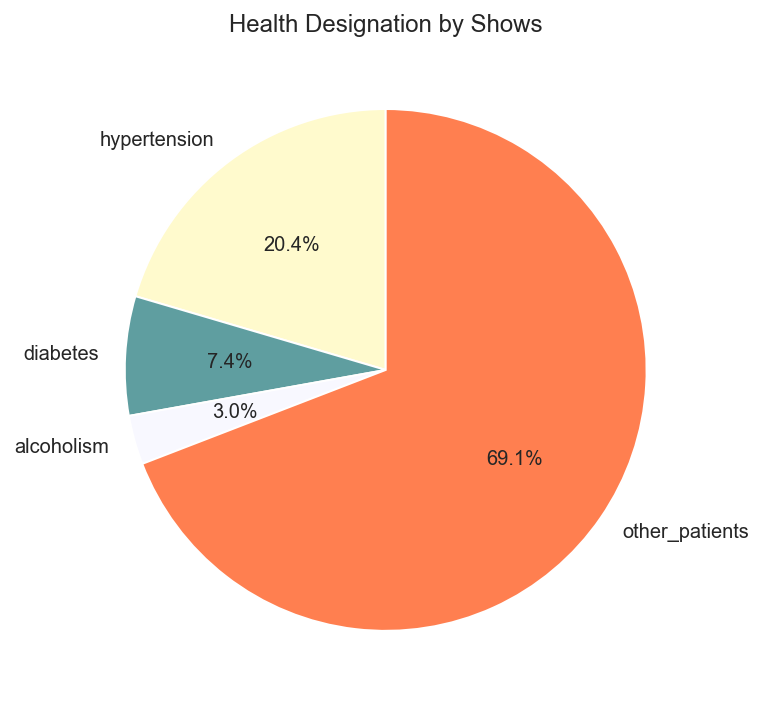

In [708]:
# plot a chart of health profile stats of no-shows
other_patients = 100 - (s_percentages[0][1] + s_percentages[1][1] + s_percentages[2][1])
values = [s_percentages[0][1], s_percentages[1][1], s_percentages[2][1], other_patients]
labels = ['hypertension', 'diabetes', 'alcoholism', 'other_patients']
colors = ['lemonchiffon', 'cadetblue', 'ghostwhite', 'coral']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Health Designation by Shows') 
fig = plt.gcf()
fig.set_size_inches(6,6);

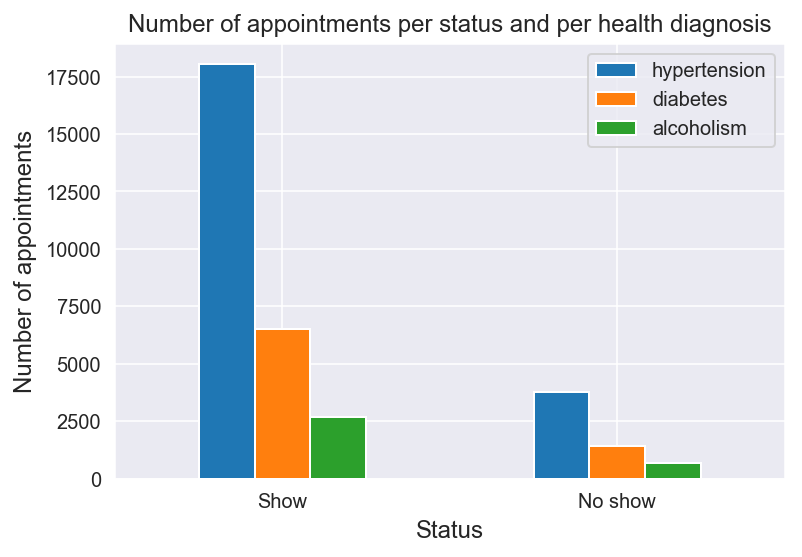

In [709]:
ax = df_clean.groupby('no_show').sum()[['hypertension','diabetes','alcoholism']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("Number of appointments",fontsize=12);
ax.set_xticklabels(['Show',"No show"], rotation=0);
plt.title('Number of appointments per status and per health diagnosis')
plt.show();

> **Conclusion:** The health profile of patients doesn’t seem to have much influence on showing up to appointment or not. Patients with hypertension have 16.9% no-show rate and 20% show rate which is not a significant difference. Similarly with alcoholism and diabetes, their proportions doesn’t seem to vary significantly.
But when the combined stats are analysed, it seems like patients with hypertension are more likely to not show up than diabetic patients and diabetic patients are more likely to not show up than alcoholic patients.

### Research Question 6: Which Locations have the highest number of no-shows?

In [710]:
# Top 10 neighborhoods by shows
shows = df_clean.query('no_show == "No"')
shows_by_hood = shows.groupby("location")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(10)

,location,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4585
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


In [711]:
# Top 10 neighborhoods by no-shows
no_shows = df_clean.query('no_show == "Yes"')
nos_by_hood = no_shows.groupby("location")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
nos_by_hood.head(10)

,location,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,550


In [712]:
no_shows = df_clean.query('no_show == "Yes"').groupby('location').no_show.count()
no_shows.sort_values(ascending=False, inplace=True)

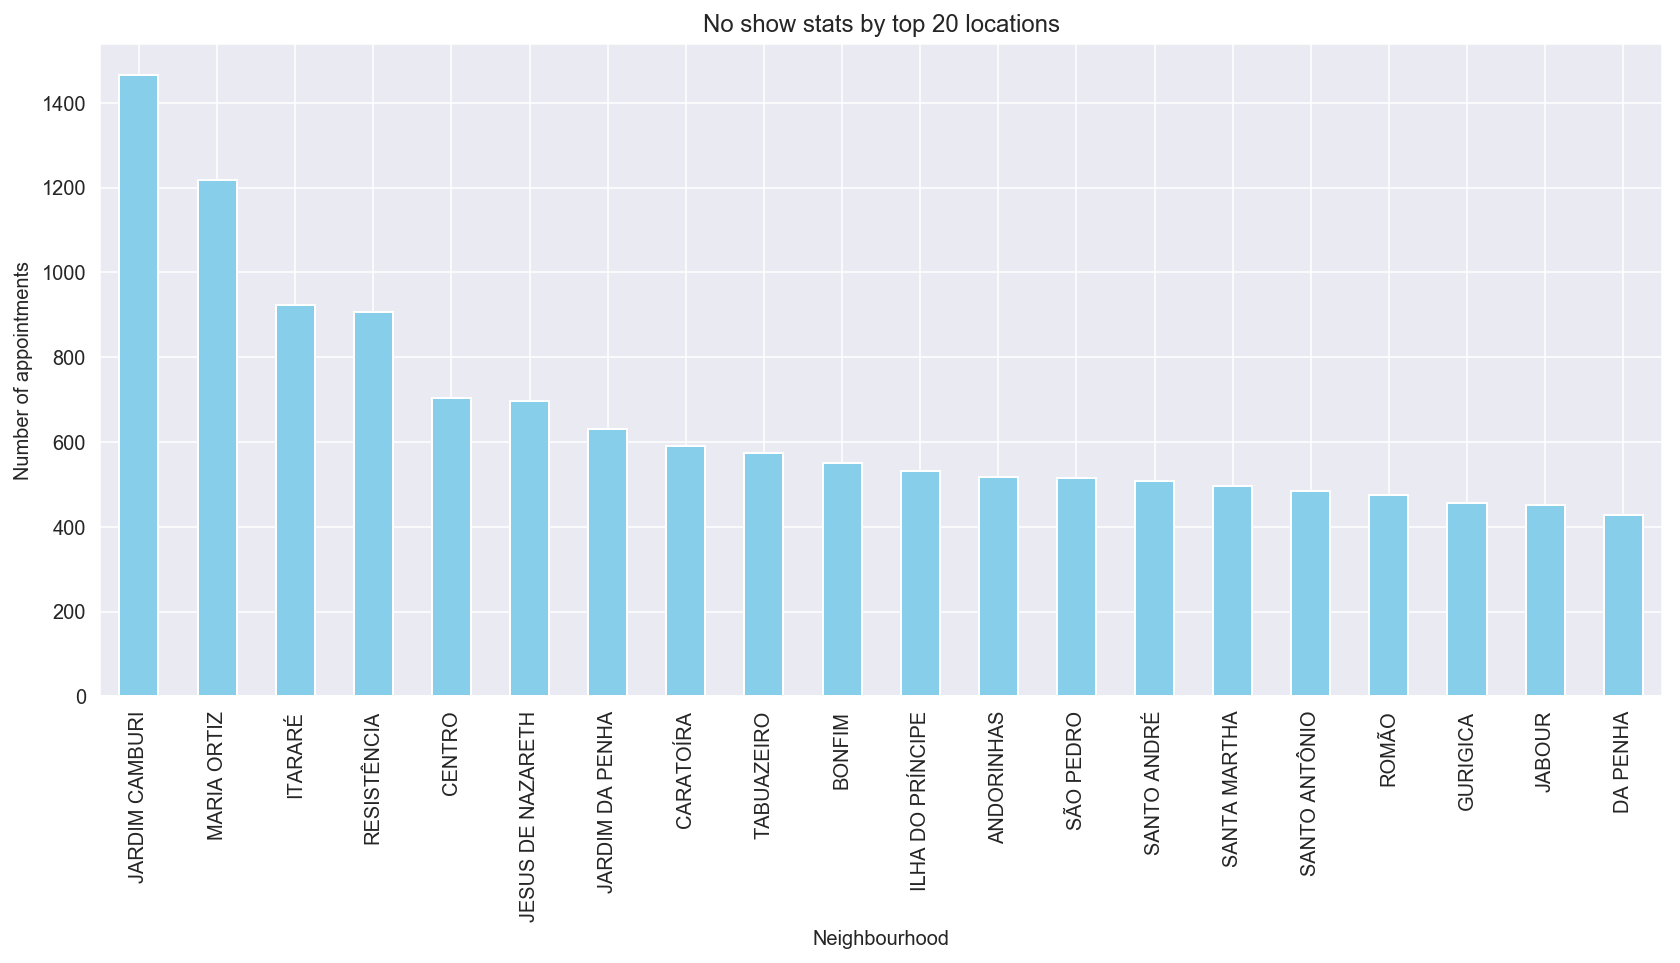

In [713]:
# plotting the data of top 20 neighbourhoods so that count of them can be seen clearly
values = no_shows[:20]
labels = no_shows.index[:20]
values.plot(kind="bar", x=labels, figsize=(14,6), color="skyblue");
plt.title("No show stats by top 20 locations");
plt.xlabel("Neighbourhood");
plt.ylabel("Number of appointments");

> **Conclusion:** Locations in which the appointment took place was charted to see if certain areas saw higher no-show rates. JARDIM CAMBURI and MARIA ORTIZ were the Top 2 neighborhoods in both the no-shows and shows segments. This is likely due to the population of these locations. It would be worth see if there is any statistical significance in the rate of no shows across different regions.

### Research Question 7 : Do appointment no-shows occur on specific days of the week?

In [714]:
no_shows = df_clean.query('no_show == "Yes"')

# Data to plot
nos_mon = no_shows.query('appointment_wday == "Monday"')
nos_mon = nos_mon['appointment_wday'].count()

nos_tue = no_shows.query('appointment_wday == "Tuesday"')
nos_tue = nos_tue['appointment_wday'].count()

nos_wed = no_shows.query('appointment_wday == "Wednesday"')
nos_wed = nos_wed['appointment_wday'].count()

nos_thu = no_shows.query('appointment_wday == "Thursday"')
nos_thu = nos_thu['appointment_wday'].count()

nos_fri = no_shows.query('appointment_wday == "Friday"')
nos_fri = nos_fri['appointment_wday'].count()

nos_sat = no_shows.query('appointment_wday == "Saturday"')
nos_sat = nos_sat['appointment_wday'].count()

nos_sun = no_shows.query('appointment_wday == "Sunday"')
nos_sun = nos_sun['appointment_wday'].count()

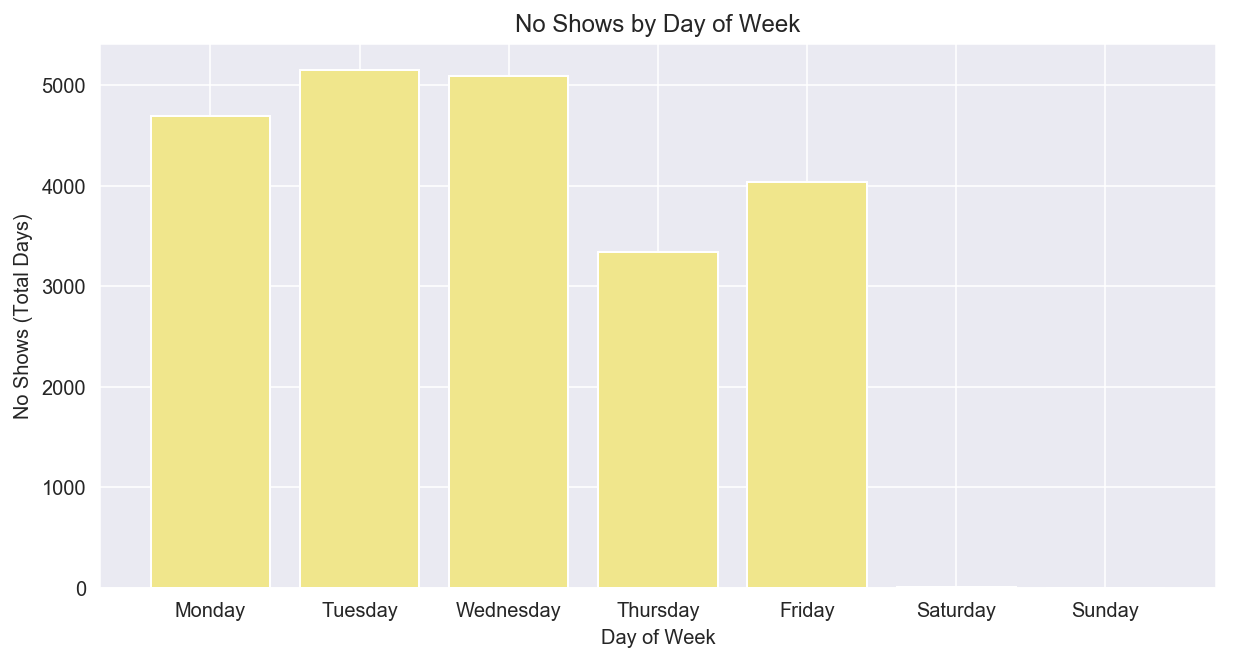

In [715]:
# The plot
locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels, color='khaki')
plt.title('No Shows by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')

fig = plt.gcf()
fig.set_size_inches(10,5);

> **Conclusion:** Appointment no-shows occurred the most on Tuesdays and the least on Thursdays. Overall, appointments early in the week have a higher no-show rate. It's difficult to draw any conclusions from this but could be run through a regression analysis to better understand which other show rate influencer day of week correlates with.

### Research Question 8: Are people receiving SMS are more likely to show up?

In [716]:
# group by sms_received and count the shows and no shows
sms_trends_data = df.groupby('sms_received').no_show.value_counts()
sms_trends_data

sms_received  no_show
0             No         62506
              Yes        12532
1             No         25697
              Yes         9784
Name: no_show, dtype: int64

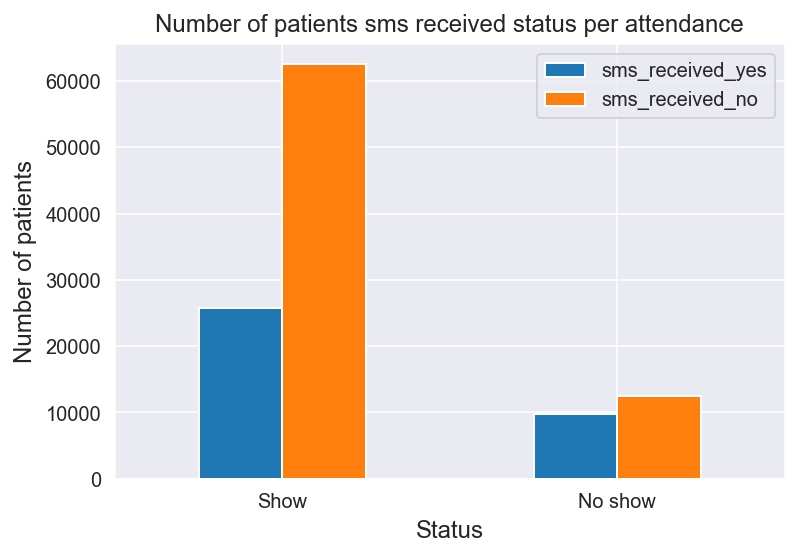

In [717]:
ax = df_clean.groupby('no_show_Yes').sum()[['sms_received_yes','sms_received_no']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("Number of patients",fontsize=12);
ax.set_xticklabels(['Show',"No show"], rotation=0);
plt.title('Number of patients sms received status per attendance')
plt.show();

> **Conclusion:** Sending SMS hardly Conclusion: Apparently, SMS is not a major factor that is influencing the percentage of no-shows because patients without receiving SMS showed up to the appointment in a great proportion. Sending SMS doesn’t really help patients to show up. Therefore, SMS hardly has an effect on no-shows. 

### Research Question 9: Do no-shows have a larger time gap between scheduled date and appointment date?

In [718]:
# check if there is a elapsed_days column that created before!
df_clean.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,...,no_show,elapsed_days,scheduled_wday,scheduled_hour,appointment_wday,age_range,no_show_No,no_show_Yes,sms_received_no,sms_received_yes
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,...,No,-1,Friday,18,Friday,aged,1,0,1,0


In [719]:
# calculate the amount of diffrence between appointment and scheduled day and drop the incorrect data
days_between_df = df_clean.drop(df_clean.index[df_clean['elapsed_days'] < 0])
days_between_df = days_between_df[['no_show', 'elapsed_days']].groupby('elapsed_days').count()

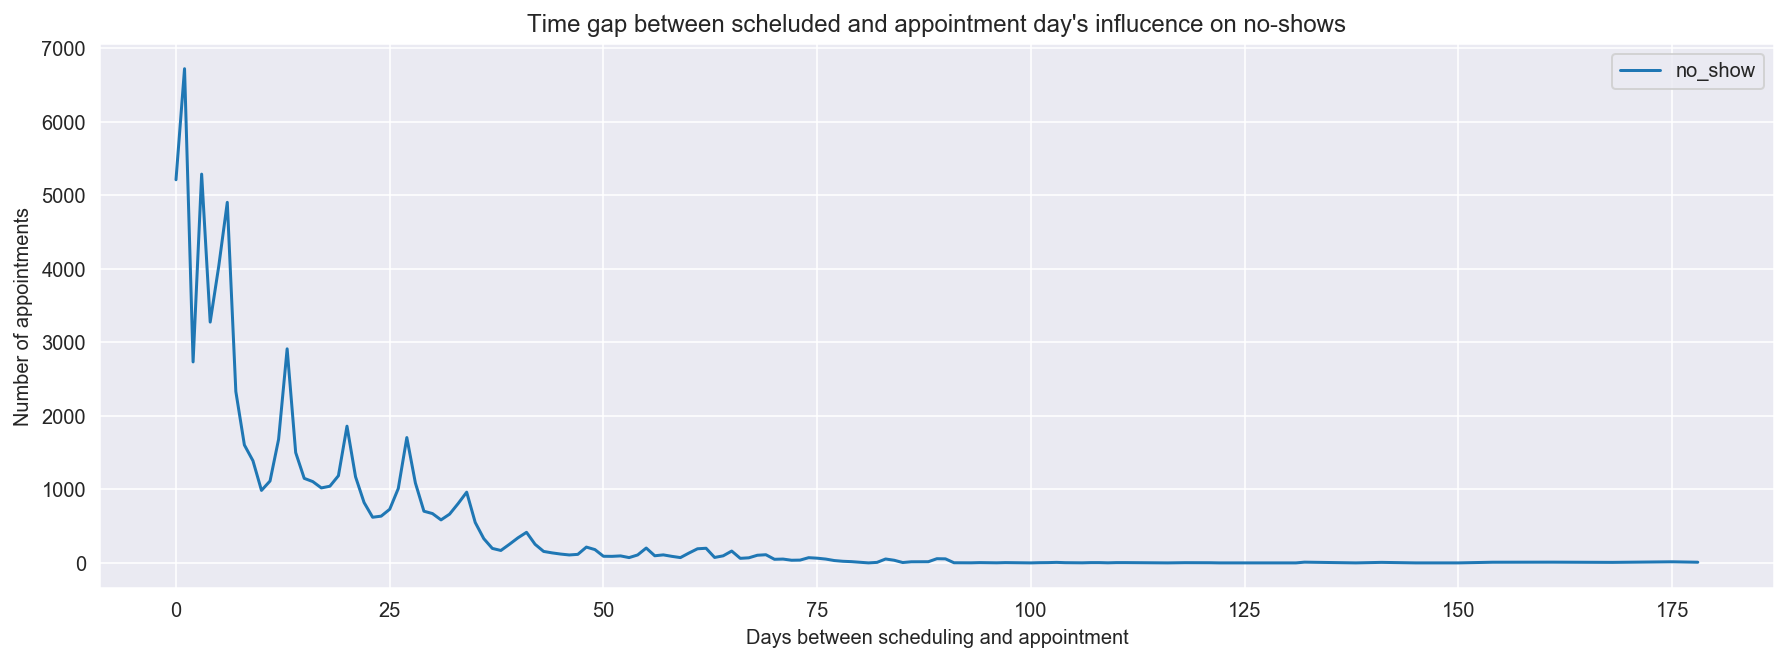

In [720]:
days_between_df.plot(kind='line', figsize=(15,5));
plt.title("Time gap between scheluded and appointment day's influcence on no-shows");
plt.xlabel('Days between scheduling and appointment');
plt.ylabel('Number of appointments');

> **Conclusion:** Patients are a lot more likely to show up when the appointment is scheduled on the same day.

<a id='conclusions'></a>
## Conclusions

> Nearly 80% of all appointments investigated were no-shows. This number was the root driver of the analysis. The following conclusions were drawn to serve as a basis for a more robust analysis in the future.

#### Limitations: 

> + The data set explored in this analysis was over a 6 month period. Data for a longer timeframe would provide insight into how seasonality and holidays impact show rates.

> + Overlaying external data sources onto this data set such as traffic, weather, or geographic data could allow us to better understand influencers on no-show rates. Right now, the analysis is limited to general correlations.

> + The above analyses are mostly two dimensional. More robust multivariate analyses would reveal causation.

> + Patients with repeat no-shows would be a good cohort to remove from the analysis to understand environmental or health factors influencing no-shows. This was not done but could improve the integrity of the investigation.

#### Findings:  
> for all the 9 questions are provided at the end of each.

#### Final Conclusion : 
> This exploratory analysis was able to correlate time between schedule day and appointment day and appointment reminders with higher appointment show rates. Running statistical analyses on these areas would be a good next step to better understand which of these factors impact appointment show rates the most and hone in on what conditions yield better appointment show rates.

> The main question was - What are the most important factors in determining the likelihood of a no-show? The most important factors were:

> The time between the scheduled and appointment date. Patients are a lot more likely to show up when the appointment is scheduled on the same day.
The Locations - Few locations have a high proportion of no-shows

## Submitting your Project 

> Report has been exported as a PDF file and have been uploaded into the repo!


In [668]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0